In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv("C:/Users/yashaswini/Downloads/Mall_Customers_clustering (3).csv")

In [5]:
data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [6]:
data1=data.drop(columns=["CustomerID","Gender","Age"],axis=1)

In [7]:
data1

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


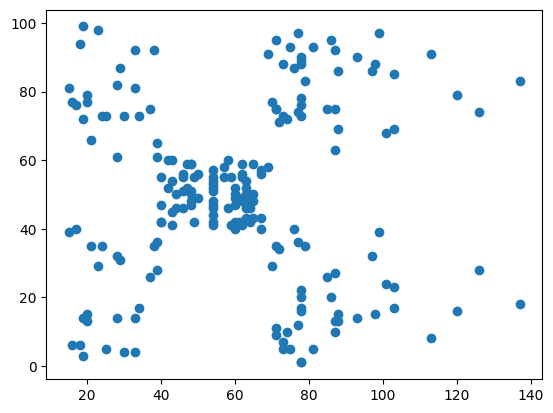

In [9]:
plt.scatter(data1["Annual Income (k$)"],data1["Spending Score (1-100)"])

In [10]:
from sklearn.cluster import KMeans

In [12]:
wcss = []

for i in range(1,21):
    km = KMeans(n_clusters=i)
    km.fit_predict(data1)
    wcss.append(km.inertia_)

In [13]:
wcss

[269981.28,
 184609.9843409062,
 106348.37306211119,
 73880.64496247195,
 44454.47647967974,
 38814.85005256372,
 32226.561192697467,
 25063.652515864094,
 22910.22312341746,
 20060.951307500087,
 18800.13357418526,
 16383.412909958257,
 15149.0914670297,
 13098.250170565872,
 13108.348883048791,
 11381.250297308055,
 10592.836425576557,
 9752.04896356367,
 9732.511624607278,
 8937.08042177121]

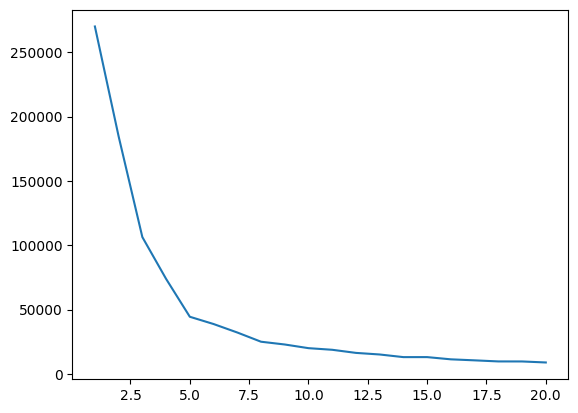

In [14]:
plt.plot(range(1,21),wcss)

In [15]:
X=data1.iloc[:,:].values
km=KMeans(n_clusters=5)
y_means=km.fit_predict(X)

In [16]:
y_means

array([3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4])

In [17]:
X[y_means == 3,0]

array([15, 16, 17, 18, 19, 19, 20, 20, 21, 23, 24, 25, 28, 28, 29, 30, 33,
       33, 34, 37, 38, 39, 39], dtype=int64)

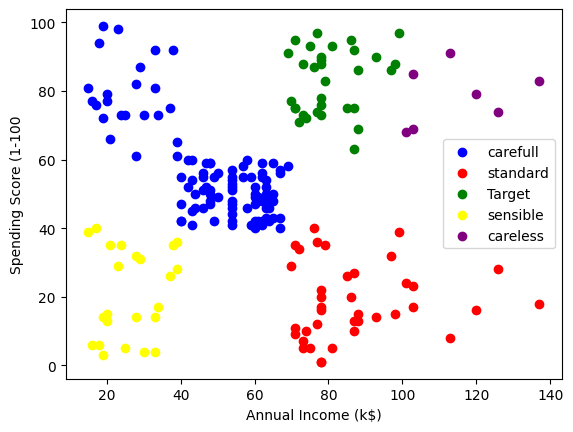

In [18]:
plt.scatter(X[y_means == 0,0],X[y_means == 0,1],color='blue',label='carefull')
plt.scatter(X[y_means == 1,0],X[y_means == 1,1],color='red',label='standard')
plt.scatter(X[y_means == 2,0],X[y_means == 2,1],color='green',label='Target')
plt.scatter(X[y_means == 3,0],X[y_means == 3,1],color='yellow',label='sensible')
plt.scatter(X[y_means == 4,0],X[y_means == 4,1],color='purple',label='careless')
plt.legend()
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100")
plt.show()

In [19]:
data1["Target"]=y_means

In [20]:
data1

,Annual Income (k$),Spending Score (1-100),Target
0,15,39,3
1,15,81,0
2,16,6,3
3,16,77,0
4,17,40,3
...,...,...,...
195,120,79,4
196,126,28,1
197,126,74,4
198,137,18,1
